In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
33,55493.95,103057.49,214634.81,Florida,96778.92
4,142107.34,91391.77,366168.42,Florida,166187.94
11,100671.96,91790.61,249744.55,California,144259.40
2,153441.51,101145.55,407934.54,Florida,191050.39
36,28663.76,127056.21,201126.82,Florida,90708.19
25,64664.71,139553.16,137962.62,California,107404.34
18,91749.16,114175.79,294919.57,Florida,124266.90
29,65605.48,153032.06,107138.38,New York,101004.64
40,28754.33,118546.05,172795.67,California,78239.91
45,1000.23,124153.04,1903.93,New York,64926.08


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# getting dummies for state column

In [5]:
dummies=pd.get_dummies(data['State'])
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


## concating the dummies

In [6]:
merged_data=pd.concat([data,dummies],axis=1)
merged_data.sample(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
32,63408.86,129219.61,46085.25,California,97427.84,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
25,64664.71,139553.16,137962.62,California,107404.34,1,0,0


In [7]:
final_data=merged_data.drop(['State','California'],axis=1)

In [8]:
final_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# EDA

## finding and removing Duplicates

In [9]:
final_data.duplicated().any()

False

## checking dtypes

In [10]:
final_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
Florida              uint8
New York             uint8
dtype: object

## checking Null values

In [11]:
final_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
Florida            0
New York           0
dtype: int64

## creating model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_model=LinearRegression()

## Train test split

In [14]:
features=final_data.drop('Profit',axis=1)

In [15]:
features.sample(3)

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0


In [16]:
Target=final_data['Profit']

In [17]:
Target.sample(4)

6     156122.51
27    105008.31
43     69758.98
32     97427.84
Name: Profit, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test =train_test_split(features,Target,train_size=0.80,random_state=100)

In [20]:
print(X_train.shape)

(40, 5)


In [21]:
print(X_test.shape)

(10, 5)


## fitting the model

In [22]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [23]:
lin_model.predict(X_test)

array([161280.45087761,  73626.4714843 ,  94136.64612149,  99269.70400154,
        59926.24314732,  51133.94307934, 163746.27541068,  97185.11390795,
       119187.6783585 ,  73867.24728982])

In [24]:
lin_model.score(X_test,y_test)

0.8845999451671906

## plotting the linear regression line

In [26]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

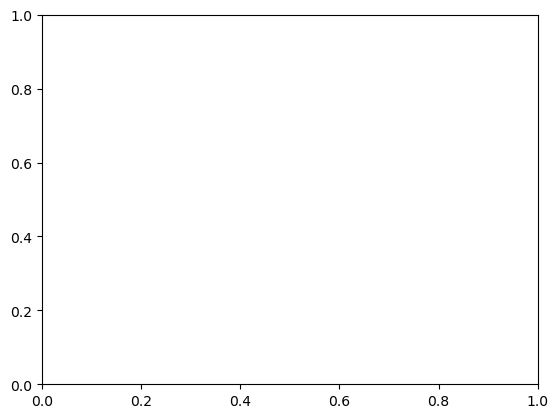

In [29]:
plt.scatter(features,Target)